In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
211,15735878,Male,52,150000,1
233,15614187,Male,49,86000,1
383,15707634,Male,49,28000,1
295,15725794,Female,36,63000,0
281,15685536,Male,35,61000,0


In [7]:
df = df.iloc[:,2:]

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

scaler.fit(x_train)

# Transforming Train and Test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [90]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [91]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


## Effect of Scaling

Text(0.5, 1.0, 'After Scaled')

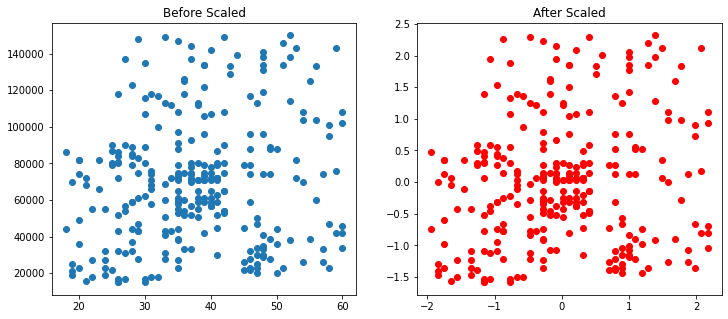

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaled")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaled")

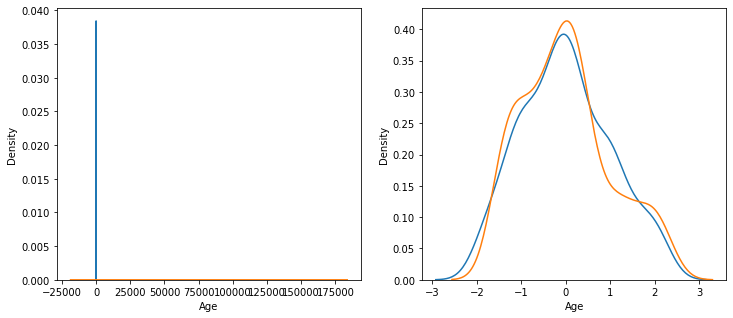

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

# Initial Data
sns.kdeplot(x_train['Age'], ax= ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax= ax1)

# Scaled Data
sns.kdeplot(x_train_scaled['Age'], ax= ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax= ax2)
plt.show()

## Scaling in Action

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression()

In [96]:
lr_scaled = LogisticRegression()

In [97]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [102]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
print('Scaled',accuracy_score(y_test, y_pred_scaled))
print('Actual',accuracy_score(y_test, y_pred))


Scaled 0.8666666666666667
Actual 0.875


# Ordinal Encoding

In [122]:
df = pd.read_csv('customer.csv')


In [123]:
df.sample(5)

,age,gender,review,education,purchased
24,16,Female,Average,PG,Yes
37,94,Male,Average,PG,Yes
4,16,Female,Average,UG,No
13,57,Female,Average,School,No
31,22,Female,Poor,School,Yes


In [124]:
df = df.iloc[:, 2:]

In [125]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:2], df.iloc[:,-1], test_size=0.2)

In [129]:
from sklearn.preprocessing import OrdinalEncoder

In [131]:
ordinalE = OrdinalEncoder(categories=([['Poor','Average','Good'],['School','UG','PG']]))

In [132]:
ordinalE.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [135]:
x_train = ordinalE.transform(x_train)
x_test = ordinalE.transform(x_test)

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()

In [139]:
le.fit(y_train)

LabelEncoder()